# Project

In [1]:
from __future__ import print_function
import os
data_path = ['data']

In [2]:
import pandas as pd

# Import the data using the file path
filepath = os.sep.join(data_path + ['milknew project no.1.csv'])
data = pd.read_csv('milknew project no.1.csv')
data


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [3]:
data.head(1).T

,0
pH,6.6
Temprature,35
Taste,1
Odor,0
Fat,1
Turbidity,0
Colour,254
Grade,high


In [4]:
data.drop (['Taste'], axis=1, inplace=True)
data

,pH,Temprature,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,0,1,0,254,high
1,6.6,36,1,0,1,253,high
2,8.5,70,1,1,1,246,low
3,9.5,34,1,0,1,255,low
4,6.6,37,0,0,0,255,medium
...,...,...,...,...,...,...,...
1054,6.7,45,1,0,0,247,medium
1055,6.7,38,0,1,0,255,high
1056,3.0,40,1,1,1,255,low
1057,6.8,43,0,1,0,250,high


In [5]:
data.columns
data

,pH,Temprature,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,0,1,0,254,high
1,6.6,36,1,0,1,253,high
2,8.5,70,1,1,1,246,low
3,9.5,34,1,0,1,255,low
4,6.6,37,0,0,0,255,medium
...,...,...,...,...,...,...,...
1054,6.7,45,1,0,0,247,medium
1055,6.7,38,0,1,0,255,high
1056,3.0,40,1,1,1,255,low
1057,6.8,43,0,1,0,250,high


In [6]:
"""from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['']:
    data[col] = le.fit_transform(data[col])
data[col]
data[col].dtype"""

"from sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\nfor col in ['']:\n    data[col] = le.fit_transform(data[col])\ndata[col]\ndata[col].dtype"

In [7]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in data.columns if x != 'Grade']

# Split the data into two dataframes
X_data = data[x_cols]
y_data = data['Grade']

# # alternatively:
# X_data = data.copy()
# y_data = X_data.pop('churned')

In [8]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(X_data),columns=X_data.columns)  # this is an np.array, not a dataframe.

/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

In [10]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(y_data == y_pred) / float(real.shape[0])

In [11]:
print(accuracy(y_data, y_pred))

0.9886685552407932


In [12]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

print(accuracy(y_data, y_pred))

0.9933899905571294


In [13]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

print(accuracy(y_data, y_pred))

0.9867799811142587


In [14]:
# Fit the K-nearest neighbors model with different values of k
# Store the accuracy measurement for each k

score_list = list()

for k in range(1, 21):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_data, y_data)
    
    y_pred = knn.predict(X_data)
    score = accuracy(y_data, y_pred)
    
    score_list.append((k, score))
    
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

In [15]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

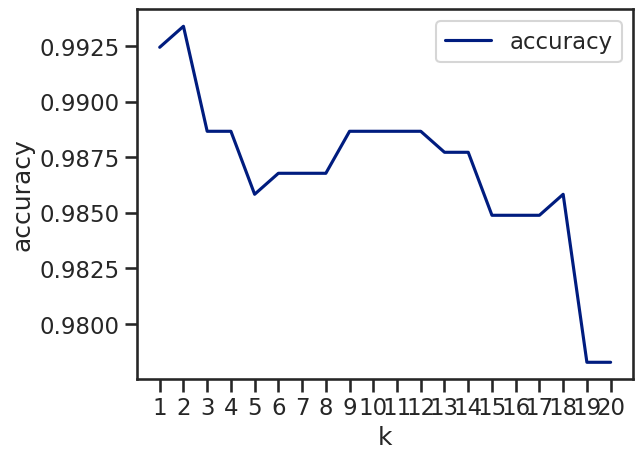

In [16]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));